![](../src/logo.svg)

**© Jesús López**

Ask him any doubt on **[Twitter](https://twitter.com/jsulopz)** or **[LinkedIn](https://linkedin.com/in/jsulopz)**

<a href="https://colab.research.google.com/github/jsulopz/resolving-machine-learning/blob/main/06_Principal%20Component%20Analysis%20%28PCA%29/06_dimensionality-reduction-pca_practice_solution.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# 06 | Principal Component Analysis (PCA)

## Load the Data

- Simply execute the following lines of code to load the data
- This dataset contains **statistics** (columns)
- About **Car Models** (rows)

In [125]:
import seaborn as sns #!

df = sns.load_dataset(name='mpg', index_col='name')
df.sample(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
name,,,,,,,,
ford mustang ii,13.0,8,302.0,129.0,3169,12.0,75,usa
datsun b210 gx,39.4,4,85.0,70.0,2070,18.6,78,japan
ford fairmont (man),25.1,4,140.0,88.0,2720,15.4,78,usa
fiat 124 sport coupe,26.0,4,98.0,90.0,2265,15.5,73,europe
datsun 210,40.8,4,85.0,65.0,2110,19.2,80,japan


## Data Preprocessing

- All variables need to be **comparables**.
- It is not the same to increase 1kg of weight, than 1m of height.
- We will use `StandardScaler()`.

*Converting categorical data to numerical data*

In [126]:
import pandas as pd

df = pd.get_dummies(df, drop_first=True)

df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,0,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,0,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,0,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,0,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,0,1


*Dropping NaN values*

In [127]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin_japan    0
origin_usa      0
dtype: int64

In [128]:
df.dropna(inplace=True)

*Scaling the data with `StandarScaler()`*

Note: *The MinMaxscaler is a type of scaler that scales the minimum and maximum values to be 0 and 1 respectively. While the StandardScaler scales all values between min and max so that they fall within a range from min to max.*

In [129]:
from sklearn.preprocessing import StandardScaler

In [130]:
scaler = StandardScaler()

In [131]:
data = scaler.fit_transform(df)

In [132]:
data[5]

array([-1.08349824,  1.48394702,  2.244637  ,  2.43302983,  1.60719812,
       -2.01112047, -1.62531533, -0.50239045,  0.77459667])

In [133]:
df_scaled = pd.DataFrame(data=data, index=df.index, columns=df.columns)

In [134]:
df_scaled.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,
chevrolet chevelle malibu,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597


## `KMeans()` Model in Python

### Fit the Model

In [135]:
from sklearn.cluster import KMeans

*We will create three clusters for the cars*

In [136]:
model_km = KMeans(n_clusters=3)

In [137]:
model_km.fit(X=df_scaled)

KMeans(n_clusters=3)

### Calculate Predictions

In [138]:
pred = model_km.predict(X=df_scaled)

pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 1, 0, 1, 2,
       0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0,

### Create a New DataFrame for the Predictions

In [139]:
df_pred = df_scaled.copy()

In [140]:
df_pred.insert(loc = 0,
          column = 'pred_KM',
          value = pred)

In [141]:
df_pred.head()

,pred_KM,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_japan,origin_usa
name,,,,,,,,,,
chevrolet chevelle malibu,2,-0.698638,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,-0.50239,0.774597
buick skylark 320,2,-1.083498,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,-0.50239,0.774597
plymouth satellite,2,-0.698638,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,-0.50239,0.774597
amc rebel sst,2,-0.955212,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,-0.50239,0.774597
ford torino,2,-0.826925,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,-0.50239,0.774597


### Visualize the Model

<AxesSubplot: xlabel='mpg', ylabel='displacement'>

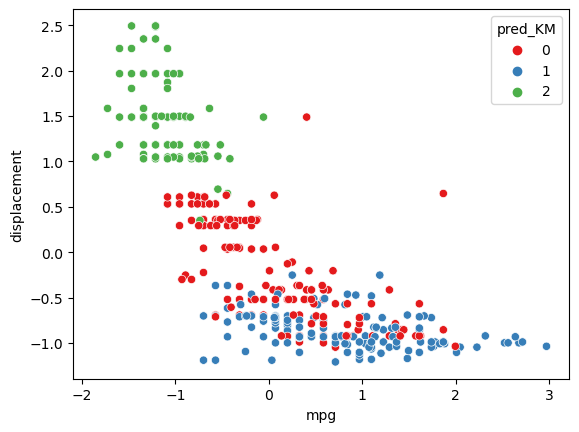

In [142]:
sns.scatterplot(data=df_pred, x="mpg", y="displacement", hue="pred_KM", palette="Set1")

*Note that there are points of diferent clusters mixed, so we need to group the data with PCA*

### Model Interpretation

- Does the visualization makes sense?
- The points are mixed between the groups, why?
- We are **just representing 2 variables**
- And the model was **fitted with 7 variables**

## Grouping Variables with `PCA()`

In [143]:
%%HTML

<iframe width="560" height="315" src="https://www.youtube.com/embed/HMOI_lkzW08" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

### Transform Data to Components

- `PCA()` is another technique used to transform data.

How has the data been manipulated so far?

1. Original Data `df`
2. Normalized Data `dfnorm`
3. Principal Components Data `dfpca` (now)

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA()

In [146]:
df_pca = pd.DataFrame(data=pca.fit_transform(df_scaled), index=df_scaled.index, columns=[f'PC{i}' for i in range (1, pca.n_components_+1)])

In [147]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.468860,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.009370,0.213293,0.073620
plymouth satellite,3.070489,0.942217,0.473735,-0.870489,-0.313946,0.723960,-0.214271,0.143188,-0.083888
amc rebel sst,3.020337,0.789743,0.661786,-0.571355,-0.319349,0.528048,-0.229069,0.292331,-0.147325
ford torino,3.007717,0.965885,0.517871,-0.996022,-0.358667,0.575475,-0.469787,-0.001799,-0.174247


### Visualize Components & Clusters

- A **scatterplot** with `PC1` & `PC2`
- Colour points by cluster
- Are they **mixed** now?

In [148]:
import plotly.express as px

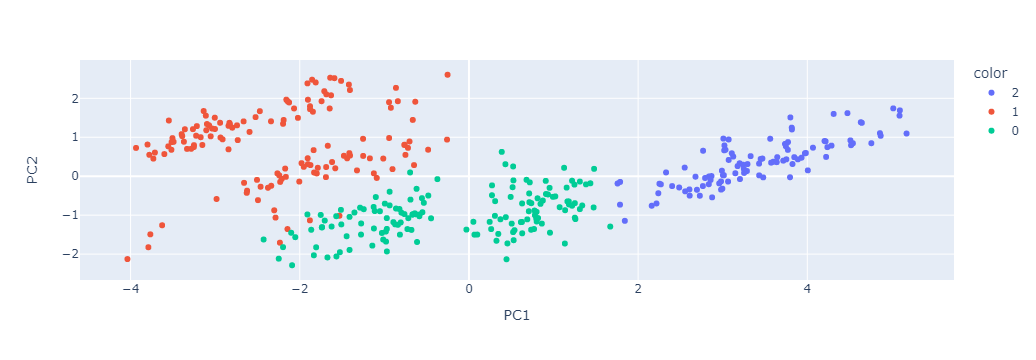

In [149]:
px.scatter(data_frame=df_pca, x="PC1", y="PC2", color=df_pred.pred_KM.astype(str), hover_name=df.index)

### PCA & Clustering Interpretation

In [150]:
pca.explained_variance_ratio_

array([0.62920572, 0.13167304, 0.09705901, 0.06659198, 0.03362041,
       0.02024791, 0.01234709, 0.00589172, 0.00336312])

## Relationship between Original Variables & Components

- [X] What do the columns PC1 & PC2 have to do with the original variables (speeding, alcohol, total,...)?
> They explain the most of the variability of the data, with `69%` for PC1 and `13%` for PC2

### Loading Vectors

In [151]:
df_weights = pd.DataFrame(pca.components_.T, columns=df_pca.columns, index=df_scaled.columns)

df_weights

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
mpg,-0.374705,-0.046189,-0.257296,-0.199342,0.031205,0.755299,0.354683,-0.195030,-0.127427
cylinders,0.390297,0.020630,-0.163054,0.222610,-0.000059,0.472667,-0.549276,0.314814,-0.383243
displacement,0.404817,0.014770,-0.150779,0.153581,-0.009156,0.297809,0.004035,-0.121299,0.828299
horsepower,0.385138,0.233024,-0.156907,-0.007860,0.169984,-0.055093,0.667713,0.528806,-0.123615
weight,0.390189,-0.040777,-0.136605,0.342554,0.205570,-0.106440,0.196891,-0.707468,-0.342374
acceleration,-0.249862,-0.447718,0.279268,0.743318,0.005795,0.103036,0.213376,0.221399,0.037513
model_year,-0.201926,-0.346888,-0.826340,0.063921,0.175107,-0.294713,-0.113877,0.128827,0.069917
origin_japan,-0.228405,0.607000,-0.276675,0.411797,-0.570073,-0.068650,0.033738,-0.047016,-0.014582
origin_usa,0.295694,-0.502024,-0.061804,-0.208639,-0.756379,-0.029489,0.168039,-0.013082,-0.108621


### Correlation Matrix

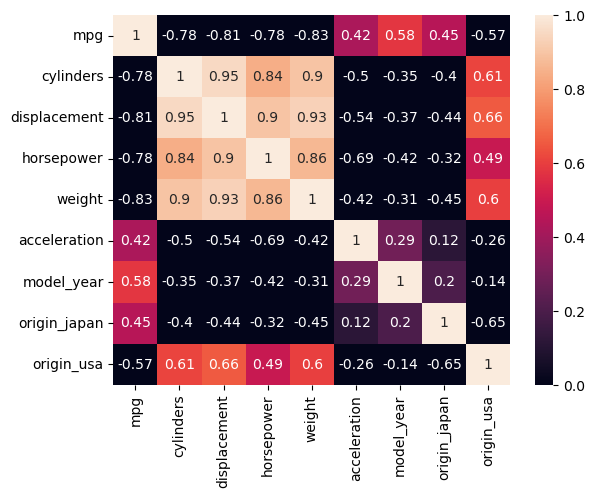

In [152]:
df_corr = df_scaled.corr()
sns.heatmap(df_corr, annot=True, vmin=0, vmax=1);

- [X] Which conclusions could you relate from the relationship of the 2 previous plots?
> The points aren´t now mixed, because we transformed it to 2-D data

### Calculating One PCA Value

- [X] How did we obtain `3.56` for **buick skylark 320** in **PC1**?

*You can see the actual PCA value for the `buick skylark 320` model*

In [163]:
df_pca.head(2)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
name,,,,,,,,,
chevrolet chevelle malibu,2.768102,0.653669,0.661643,-0.585333,-0.382837,0.750140,-0.46886,-0.095520,-0.120586
buick skylark 320,3.561796,0.961842,0.474659,-0.511149,-0.199102,0.489416,0.00937,0.213293,0.073620


*We just multiply the weight of PC1 by all the features of the original data of the car, and we get the sum:*

In [156]:
(df_weights['PC1'] * df_scaled.loc['buick skylark 320']).sum()

3.561795612113786

## Explained Variance Ratio

In [167]:
df_pca.columns

Index(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'], dtype='object')

In [166]:
pca.explained_variance_ratio_

array([0.62920572, 0.13167304, 0.09705901, 0.06659198, 0.03362041,
       0.02024791, 0.01234709, 0.00589172, 0.00336312])

In [173]:
pd.DataFrame(data=pca.explained_variance_ratio_, index=df_pca.columns, columns=["Explained variance ratio for each PC"]).style.background_gradient()

,Explained variance ratio for each PC
PC1,0.629206
PC2,0.131673
PC3,0.097059
PC4,0.066592
PC5,0.033620
PC6,0.020248
PC7,0.012347
PC8,0.005892
PC9,0.003363


### Biplot

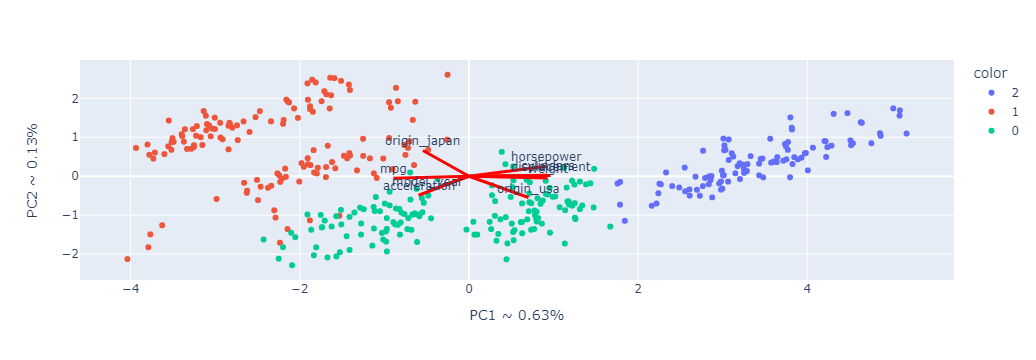

In [175]:
import numpy as np

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
evr = pca.explained_variance_ratio_.round(2)

fig = px.scatter(df_pca, x='PC1', y='PC2',
                 color=model_km.labels_.astype(str),
                 hover_name=df_pca.index,
                labels={
                    'PC1': f'PC1 ~ {evr[0]}%',
                    'PC2': f'PC2 ~ {evr[1]}%'
                })

for i, feature in enumerate(df_scaled.columns):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1],
        line=dict(color="red",width=3)
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )

fig.show()

# Achieved Goals

_Double click on **this cell** and place an `X` inside the square brackets (i.e., [X]) if you think you understand the goal:_

- [X] Understand the role of **Linear Algebra** on Machine Learning
    - Matrix Multiplications with the `loadings`
- [X] Necessity to `StandardScaler()` the data when the algorithm implies distance calculations
- [X] Understand that every Machine Learning process is a matter of optimization
    - To find the best numbers based on a criteria
    - How is done in `PCA()`?
- [X] Why would you use PCA?
    - Visualization
    - Preprocess the data for modelling
- [X] There are techniques for everything
    - [X] Grouping observations
    - [X] Grouping variables

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.